# Author: Kazi Amit Hasan
#### Problem: House Price Prediction using CNN and predicting whether the house price is above or below median value.

## Todo:
1. Add more layers

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("housepricedata.csv")

In [3]:
df.head()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1


In [4]:
df.tail()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0
1459,9937,5,6,1256,1,1,3,6,0,276,0


In [5]:
df.columns

Index(['LotArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageArea',
       'AboveMedianPrice'],
      dtype='object')

In [6]:
df.shape

(1460, 11)

In [7]:
df.describe()


,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,6.099315,5.575342,1057.429452,1.565068,0.382877,2.866438,6.517808,0.613014,472.980137,0.498630
std,9981.264932,1.382997,1.112799,438.705324,0.550916,0.502885,0.815778,1.625393,0.644666,213.804841,0.500169
min,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,7553.500000,5.000000,5.000000,795.750000,1.000000,0.000000,2.000000,5.000000,0.000000,334.500000,0.000000
50%,9478.500000,6.000000,5.000000,991.500000,2.000000,0.000000,3.000000,6.000000,1.000000,480.000000,0.000000
75%,11601.500000,7.000000,6.000000,1298.250000,2.000000,1.000000,3.000000,7.000000,1.000000,576.000000,1.000000
max,215245.000000,10.000000,9.000000,6110.000000,3.000000,2.000000,8.000000,14.000000,3.000000,1418.000000,1.000000


In [8]:
dataset = df.values

In [9]:
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]])

In [10]:
x = dataset[:,0:10]

In [11]:
y = dataset[:,10]

In [12]:
from sklearn import preprocessing

In [13]:
min_max_scaler = preprocessing.MinMaxScaler()
x_scale = min_max_scaler.fit_transform(x)

In [14]:
x_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train, x_val_and_test, y_train, y_val_and_test = train_test_split(
    x_scale, y, test_size=0.3)

In [17]:
x_val, x_test, y_val, y_test = train_test_split(x_val_and_test,
                                                y_val_and_test,
                                                test_size=0.5)

In [18]:
print(x_train.shape, x_val.shape, x_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

(1022, 10) (219, 10) (219, 10)
(1022,) (219,) (219,)


In [19]:
import tensorflow as tf
from tensorflow.keras import models, layers

In [20]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(10, )),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

W0517 11:53:03.964344 4552322496 deprecation.py:506] From /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [21]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

W0517 11:53:04.114196 4552322496 deprecation.py:323] From /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [22]:
hist = model.fit(x_train,
                 y_train,
                 batch_size=32,
                 epochs=100,
                 validation_data=(x_val, y_val))

Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 0s 156us/sample - loss: 0.6819 - acc: 0.6800 - val_loss: 0.6821 - val_acc: 0.6575
Epoch 2/100
1022/1022 [==============================] - 0s 40us/sample - loss: 0.6759 - acc: 0.6898 - val_loss: 0.6777 - val_acc: 0.6530
Epoch 3/100
1022/1022 [==============================] - 0s 28us/sample - loss: 0.6708 - acc: 0.6937 - val_loss: 0.6736 - val_acc: 0.6621
Epoch 4/100
1022/1022 [==============================] - 0s 28us/sample - loss: 0.6658 - acc: 0.7319 - val_loss: 0.6694 - val_acc: 0.6804
Epoch 5/100
1022/1022 [==============================] - 0s 28us/sample - loss: 0.6607 - acc: 0.7436 - val_loss: 0.6652 - val_acc: 0.6941
Epoch 6/100
1022/1022 [==============================] - 0s 27us/sample - loss: 0.6557 - acc: 0.7407 - val_loss: 0.6611 - val_acc: 0.7169
Epoch 7/100
1022/1022 [==============================] - 0s 29us/sample - loss: 0.6508 - acc: 0.7622 - val_loss: 0.6571 - va

1022/1022 [==============================] - 0s 31us/sample - loss: 0.3283 - acc: 0.8650 - val_loss: 0.3793 - val_acc: 0.8311
Epoch 60/100
1022/1022 [==============================] - 0s 29us/sample - loss: 0.3256 - acc: 0.8669 - val_loss: 0.3775 - val_acc: 0.8402
Epoch 61/100
1022/1022 [==============================] - 0s 30us/sample - loss: 0.3233 - acc: 0.8669 - val_loss: 0.3761 - val_acc: 0.8402
Epoch 62/100
1022/1022 [==============================] - 0s 30us/sample - loss: 0.3214 - acc: 0.8679 - val_loss: 0.3728 - val_acc: 0.8356
Epoch 63/100
1022/1022 [==============================] - 0s 31us/sample - loss: 0.3198 - acc: 0.8669 - val_loss: 0.3709 - val_acc: 0.8402
Epoch 64/100
1022/1022 [==============================] - 0s 31us/sample - loss: 0.3181 - acc: 0.8718 - val_loss: 0.3691 - val_acc: 0.8402
Epoch 65/100
1022/1022 [==============================] - 0s 31us/sample - loss: 0.3158 - acc: 0.8699 - val_loss: 0.3687 - val_acc: 0.8356
Epoch 66/100
1022/1022 [================

In [23]:
model.evaluate(x_test, y_test)[1]


219/219 [==============================] - 0s 31us/sample - loss: 0.2522 - acc: 0.9178


0.91780823

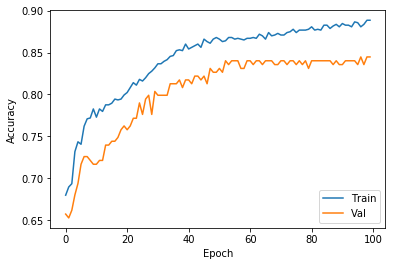

In [24]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')

plt.show()

#### Reference: https://www.freecodecamp.org/news/how-to-build-your-first-neural-network-to-predict-house-prices-with-keras-f8db83049159/